In [10]:
#Importamos las librerias
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Credenciales de la API
client_id = '1bcad6ade4bd41a593f267461f73e2db'
client_secret = '6480addfe5e74a83ab335a61231aae27'

# Autenticación
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [12]:
# Función para obtener pistas por género
def get_tracks_by_genre(genre, limit=1000):
    tracks = []
    results = sp.search(q=f'genre:"{genre}"', type='track', limit=50)
    tracks.extend(results['tracks']['items'])
    
    while len(tracks) < limit and results['tracks']['next']:
        results = sp.next(results['tracks'])
        tracks.extend(results['tracks']['items'])
    
    return tracks

# Obtener pistas de varios géneros
genres = ['rock', 'pop', 'hip-hop', 'classical', 'jazz']
all_tracks = []

for genre in genres:
    tracks = get_tracks_by_genre(genre, limit=200)  # Ajusta el límite según sea necesario
    for track in tracks:
        track['genre'] = genre  # Añadir el género como un campo
    all_tracks.extend(tracks)

# Crear listas para los datos
track_names = []
popularity = []
album_names = []
release_dates = []
track_ids = []
artist_names = []
durations = []
genres_list = []

# Llenar las listas con los datos correspondientes
for track in all_tracks:
    track_names.append(track['name'])
    popularity.append(track['popularity'])
    album_names.append(track['album']['name'])
    release_dates.append(track['album']['release_date'])
    track_ids.append(track['id'])
    artist_names.append(track['artists'][0]['name'])  # Primer artista
    durations.append(track['duration_ms'])
    genres_list.append(track['genre'])

# Crear un dataframe con los datos extraídos
df = pd.DataFrame({
    'track_name': track_names,
    'popularity': popularity,
    'album_name': album_names,
    'release_date': release_dates,
    'track_id': track_ids,
    'artist_name': artist_names,
    'duration_ms': durations,
    'genre': genres_list
})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_name    500 non-null    object
 1   popularity    500 non-null    int64 
 2   album_name    500 non-null    object
 3   release_date  500 non-null    object
 4   track_id      500 non-null    object
 5   artist_name   500 non-null    object
 6   duration_ms   500 non-null    int64 
 7   genre         500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
df.describe()

,popularity,duration_ms
count,500.000000,5.000000e+02
mean,3.484000,2.224236e+05
std,8.047563,1.164546e+05
min,0.000000,1.857400e+04
25%,0.000000,1.491150e+05
50%,0.000000,2.023790e+05
75%,2.000000,2.572218e+05
max,57.000000,1.036490e+06


In [15]:
df_shape = df.shape
print(f"Dimensiones del DataFrame: {df_shape}")

Dimensiones del DataFrame: (500, 8)


In [16]:
df_columns = df.columns
print(f"Columnas del DataFrame: {df_columns}")

Columnas del DataFrame: Index(['track_name', 'popularity', 'album_name', 'release_date', 'track_id',
       'artist_name', 'duration_ms', 'genre'],
      dtype='object')


In [17]:
# Función para obtener pistas por género
def get_tracks_by_genre(genre, limit=1000):
    tracks = []
    results = sp.search(q=f'genre:"{genre}"', type='track', limit=50)
    tracks.extend(results['tracks']['items'])
    
    while len(tracks) < limit and results['tracks']['next']:
        results = sp.next(results['tracks'])
        tracks.extend(results['tracks']['items'])
    
    return tracks

# Obtener pistas de varios géneros
genres = ['rock', 'pop', 'hip-hop', 'classical', 'jazz']
all_tracks = []

for genre in genres:
    tracks = get_tracks_by_genre(genre, limit=200)  # Ajusta el límite según sea necesario
    for track in tracks:
        track['genre'] = genre  # Añadir el género como un campo
    all_tracks.extend(tracks)

# Crear listas para los datos
track_names = []
popularity = []
album_names = []
release_dates = []
track_ids = []
artist_names = []
durations = []
genres_list = []

# Llenar las listas con los datos correspondientes
for track in all_tracks:
    track_names.append(track['name'])
    popularity.append(track['popularity'])
    album_names.append(track['album']['name'])
    release_dates.append(track['album']['release_date'])
    track_ids.append(track['id'])
    artist_names.append(track['artists'][0]['name'])  # Primer artista
    durations.append(track['duration_ms'])
    genres_list.append(track['genre'])

# Crear un dataframe con los datos extraídos
df = pd.DataFrame({
    'track_name': track_names,
    'popularity': popularity,
    'album_name': album_names,
    'release_date': release_dates,
    'track_id': track_ids,
    'artist_name': artist_names,
    'duration_ms': durations,
    'genre': genres_list
})

# Obtener características de audio para cada pista
audio_features = []
for track_id in track_ids:
    features = sp.audio_features(track_id)[0]
    audio_features.append(features)

# Convertir las características de audio en un dataframe
features_df = pd.DataFrame(audio_features)

# Eliminar la columna 'duration_ms' de features_df para evitar duplicados
features_df = features_df.drop(columns=['duration_ms'])

# Unir el dataframe original con las características de audio
df = df.join(features_df.set_index('id'), on='track_id')

# Mostrar las primeras filas del dataframe combinado
print(df.head())

         track_name  popularity          album_name release_date  \
0  Bard of My Heart           0  Voices / Shameless   2014-04-15   
1    Durch die Wand           1  Immer durch Flüsse   2022-12-09   
2        Alles Egal           0       Keine Lichter   2019-03-22   
3           Gambler           1            Mudanzas   1973-01-01   
4        The Gorgan           0              Legend   2010-11-11   

                 track_id       artist_name  duration_ms genre  danceability  \
0  3ich6m5IUAX7BdijfA6bNx      Judy Collins       235600  rock         0.404   
1  1twME2xmB6gi09xUOyDGoV        BETAMENSCH       211957  rock         0.446   
2  4r4CfMLc8M7pSATW8zccrl          Postford       132446  rock         0.643   
3  3PWbSmdi1qL3mE92QvGGzn             Stray       216013  rock         0.562   
4  2JvqZ7xjprzDHw3KF8BH2g  Cornell Campbell       149466  rock         0.710   

   energy  ...  acousticness  instrumentalness  liveness  valence    tempo  \
0   0.148  ...       0.87500    

In [18]:
#Tratamos los nulos
print(df.isnull().sum())


track_name          0
popularity          0
album_name          0
release_date        0
track_id            0
artist_name         0
duration_ms         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
time_signature      0
dtype: int64


In [19]:
#Se verifican los valores duplicados
print(df.duplicated().sum())

2


In [20]:
#Se eliminan los valores duplicados al ser pocos
df.drop_duplicates(inplace=True)

Cuestiones a tener en cuenta:
_ Hay relación entre las características musicales de una canción y su género? En ese caso, se podrá categorizar a una canción científicamente como "Rock" escuchando solamente sus notas?
_ Respecto a la duración de la canción, hay alguna diferencia entre géneros? Hay géneros que propongan piezas musicales más cortas o largas que otros?

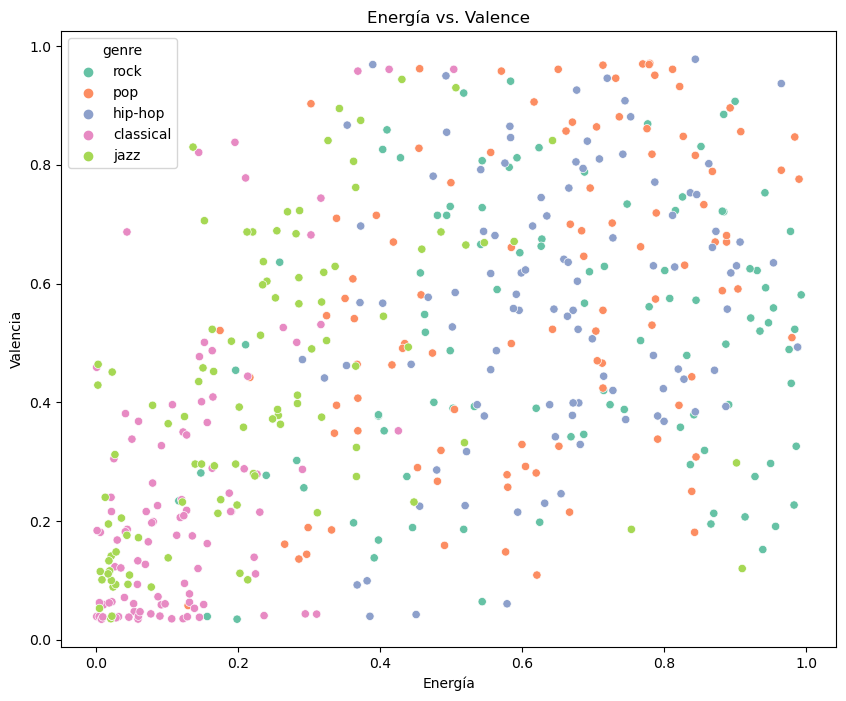

In [21]:
#Hacemos un mapa de dispersión entre la Valence y la Energía de una canción, identificando con canciones de cada género.
#Por ejemplo podemos ver que las canciones "Classical" tienen baja Valence y baja Energía.
# Scatterplot de energía vs valencia
plt.figure(figsize=(10, 8))
sns.scatterplot(x='energy', y='valence', data=df, hue='genre', palette='Set2')
plt.title('Energía vs. Valence')
plt.xlabel('Energía')
plt.ylabel('Valencia')
plt.show()

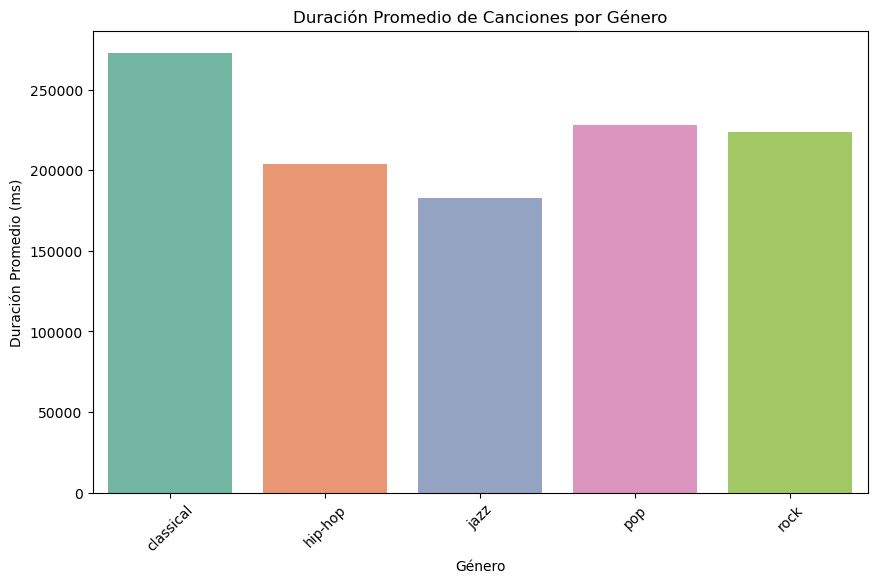

In [22]:
# Calcular la duración promedio por género
average_duration = df.groupby('genre')['duration_ms'].mean().reset_index()

# Gráfico de barras agrupadas de duración promedio por género
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='duration_ms', data=average_duration, palette='Set2')
plt.title('Duración Promedio de Canciones por Género')
plt.xlabel('Género')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=45)
plt.show()

Características a graficar: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


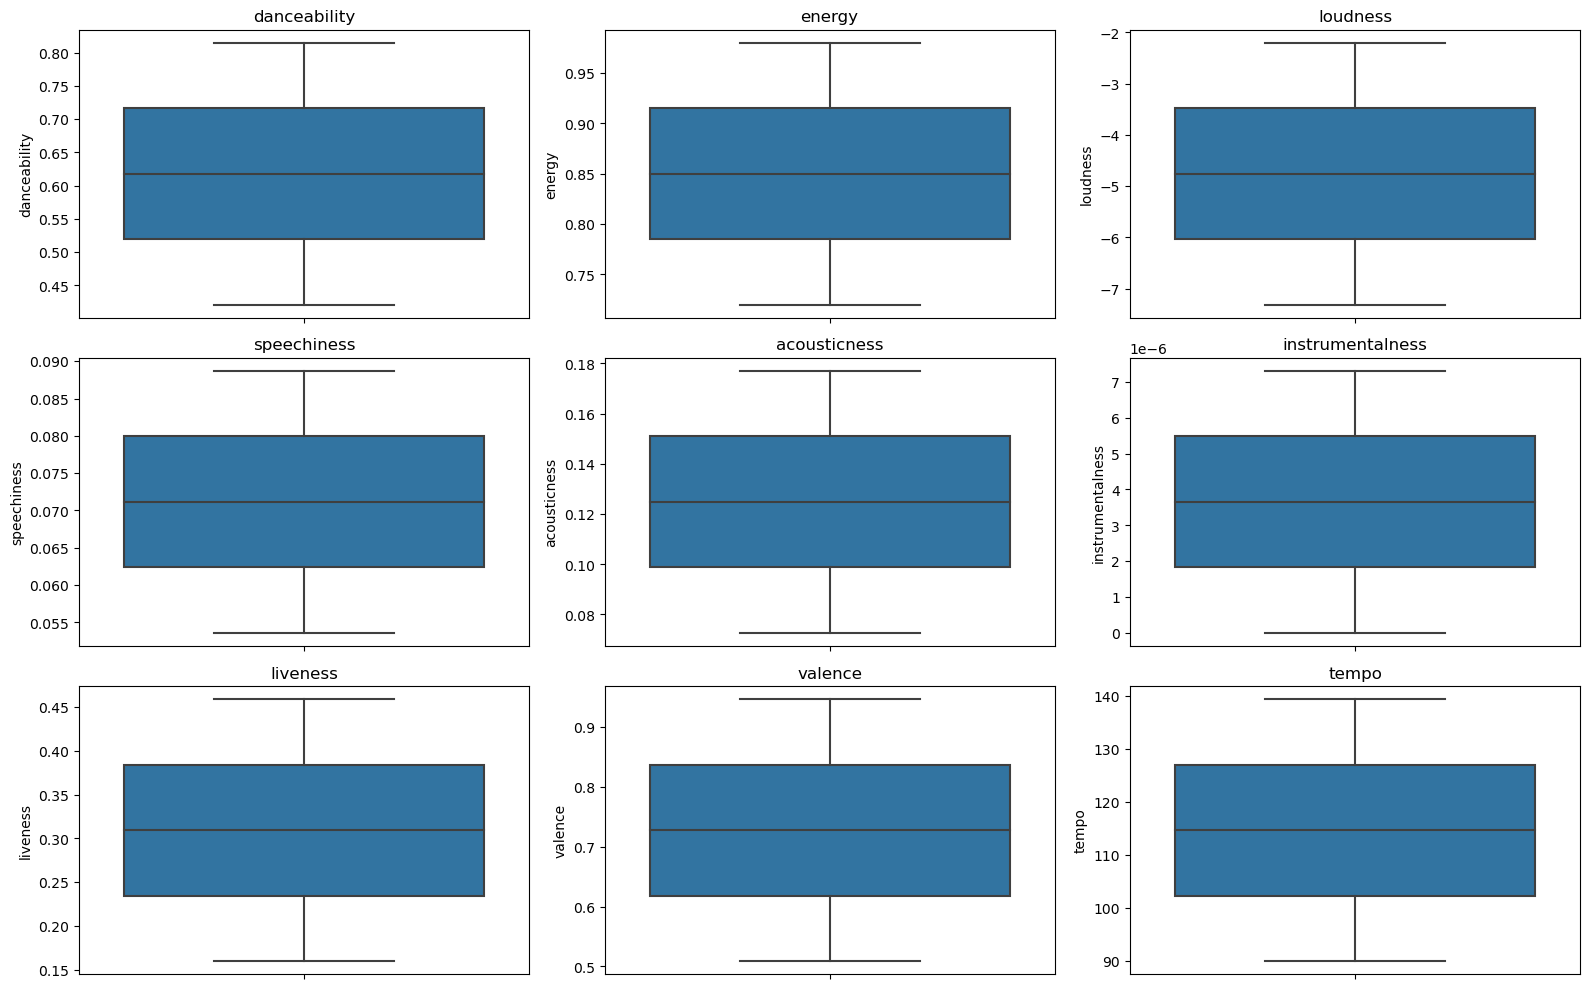

In [38]:
umbral_popularidad = 45 
df_populares = df[df['popularity'] > umbral_popularidad]

# Características a visualizar
caracteristicas = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Verificar si todas las características están en el DataFrame
caracteristicas_existentes = [caracteristica for caracteristica in caracteristicas if caracteristica in df.columns]
print("Características a graficar:", caracteristicas_existentes)

# Crear gráficos
plt.figure(figsize=(16, 10))
for i, caracteristica in enumerate(caracteristicas_existentes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_populares, y=caracteristica)
    plt.title(caracteristica)

plt.tight_layout()
plt.show()

In [23]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
            'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]  # Variables independientes (características de audio)
y = df['genre']   # Variable dependiente (género)

In [24]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo de Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo Gradient Boosting
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Función para evaluar y mostrar resultados
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluar SVM
print("Support Vector Machine:")
evaluate_model(svm_model, X_test, y_test)

# Evaluar Random Forest
print("\nRandom Forest Classifier:")
evaluate_model(rf_model, X_test, y_test)

# Evaluar Gradient Boosting
print("\nGradient Boosting Classifier:")
evaluate_model(gb_model, X_test, y_test)

Support Vector Machine:
Accuracy Score: 0.58

Classification Report:
              precision    recall  f1-score   support

   classical       0.74      0.96      0.84        24
     hip-hop       0.67      0.60      0.63        10
        jazz       0.80      0.67      0.73        24
         pop       0.23      0.50      0.32        14
        rock       0.60      0.21      0.32        28

    accuracy                           0.58       100
   macro avg       0.61      0.59      0.57       100
weighted avg       0.64      0.58      0.57       100


Random Forest Classifier:
Accuracy Score: 0.65

Classification Report:
              precision    recall  f1-score   support

   classical       0.78      0.88      0.82        24
     hip-hop       0.70      0.70      0.70        10
        jazz       0.78      0.75      0.77        24
         pop       0.27      0.43      0.33        14
        rock       0.72      0.46      0.57        28

    accuracy                           0.65 